In [1]:
#Took from lesson 3.05-lesson-feature-engineering
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
%matplotlib inline

In [2]:
home_test = pd.read_csv('datasets/test.csv')
home_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [3]:
home_train = pd.read_csv('datasets/train.csv')
home_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


We can already see that there are some issues with some of our columns. Some have NaN values. Let's see how many

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
home_train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

That is a lot of null values. Too many to just dropna. We can see that there is a cut off at around 50. So let's make a function that deletes columns that have a isnull value of 50 or higher. The rest we will dropna

In [6]:
home_cols = [n for n in home_train.columns]
home_cols

['Id',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Are

In [7]:
#drop every column where null values are more than 50
c = 0
home_del = []
for i in home_train.isnull().sum():
    if i >= 50:
        home_del.append(home_cols[c])
    c += 1
home_del

['Lot Frontage',
 'Alley',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [8]:
home_test = home_test.drop(columns = home_del)
home_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,9142,Pave,Reg,Lvl,AllPub,Inside,...,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,9662,Pave,IR1,Lvl,AllPub,Inside,...,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,17104,Pave,IR1,Lvl,AllPub,Inside,...,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,8520,Pave,Reg,Lvl,AllPub,Inside,...,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,9500,Pave,IR1,Lvl,AllPub,Inside,...,0,76,0,0,185,0,0,7,2009,WD


In [9]:
home_train = home_train.drop(columns = home_del)
home_train.isnull().sum()

Id                  0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       22
Mas Vnr Area       22
Exter Qual          0
Exter Cond          0
Foundation          0
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Heating             0
Heating QC          0
Central Air         0
Electrical          0
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom Ab

In [10]:
home_test.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       1
Mas Vnr Area       1
Exter Qual         0
Exter Cond         0
Foundation         0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         1
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual 

In [11]:
#Replace the NA
home_train.dropna(inplace=True)

Looking at the data dictionary we can see that many of the files are duplicates (or at least far to similar). We are going to delete some of them so we don't get copy cat information

In [12]:
#Let's make a matrix of them
duplo = ['MS SubClass', 'Lot Shape', 'Lot Config', 'Land Slope', 'Condition 2', 'House Style', 'Overall Cond', 'Year Remod/Add', 'Exterior 2nd', 'Exter Cond', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Heating', 'Garage Cars']
home_train = home_train.drop(columns = duplo)
home_test = home_test.drop(columns = duplo)

Central air is either Yes or No so let's make Yes 1 and No 0

In [13]:
home_train['Central Air'] = home_train['Central Air'].map(lambda ca: 1 if ca == "Y" else 0)
home_test['Central Air'] = home_test['Central Air'].map(lambda ca: 1 if ca == "Y" else 0)

In [14]:
#Let's look at the info
home_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2050
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2026 non-null   int64  
 1   PID              2026 non-null   int64  
 2   MS Zoning        2026 non-null   object 
 3   Lot Area         2026 non-null   int64  
 4   Street           2026 non-null   object 
 5   Land Contour     2026 non-null   object 
 6   Utilities        2026 non-null   object 
 7   Neighborhood     2026 non-null   object 
 8   Condition 1      2026 non-null   object 
 9   Bldg Type        2026 non-null   object 
 10  Overall Qual     2026 non-null   int64  
 11  Year Built       2026 non-null   int64  
 12  Roof Style       2026 non-null   object 
 13  Roof Matl        2026 non-null   object 
 14  Exterior 1st     2026 non-null   object 
 15  Mas Vnr Type     2026 non-null   object 
 16  Mas Vnr Area     2026 non-null   float64
 17  Exter Qual    

The data looks nice and clean. Now let's exam a heat map to see any correlations

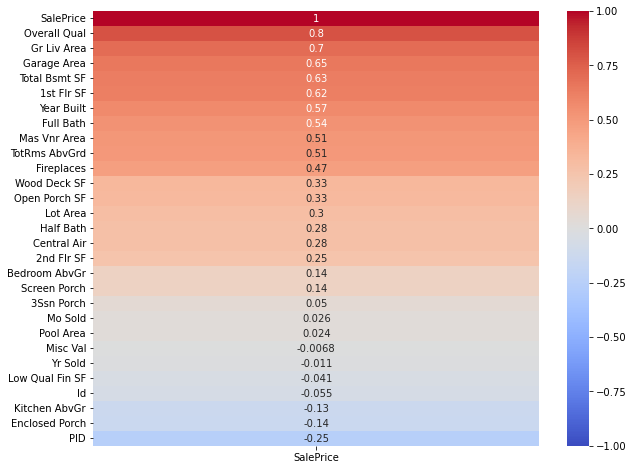

In [15]:
#Let's see the heat map without making dummies to see if we can reduce this further
#Based on Breakfast hour Thursday the 9th
plt.figure(figsize=(10,8))
sns.heatmap(home_train.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

We want a good cut off point so that the data is overfit or underfit. Let's let 0.6 be that cut off point

In [16]:
#Let's delete where the corrilation is less than 0.6
low_corr_array = ['Year Built', 'Full Bath', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Half Bath', 'Central Air', '2nd Flr SF', 'Bedroom AbvGr', 'Screen Porch', '3Ssn Porch', 'Mo Sold', 'Pool Area', 'Misc Val', 'Yr Sold', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Enclosed Porch', 'PID']

In [17]:
home_train = home_train.drop(columns = low_corr_array)
home_test = home_test.drop(columns = low_corr_array)
home_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2050
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2026 non-null   int64  
 1   MS Zoning      2026 non-null   object 
 2   Street         2026 non-null   object 
 3   Land Contour   2026 non-null   object 
 4   Utilities      2026 non-null   object 
 5   Neighborhood   2026 non-null   object 
 6   Condition 1    2026 non-null   object 
 7   Bldg Type      2026 non-null   object 
 8   Overall Qual   2026 non-null   int64  
 9   Roof Style     2026 non-null   object 
 10  Roof Matl      2026 non-null   object 
 11  Exterior 1st   2026 non-null   object 
 12  Mas Vnr Type   2026 non-null   object 
 13  Exter Qual     2026 non-null   object 
 14  Foundation     2026 non-null   object 
 15  Total Bsmt SF  2026 non-null   float64
 16  Heating QC     2026 non-null   object 
 17  Electrical     2026 non-null   object 
 18  1st Flr 

We see that many of the columns are object typed. We can't do much with that. But we can turn them into dummy variables in order to possibly find some trends

In [18]:
#Let's Create Dummies and find out which ones are relevent or not
home_array = [n for n in home_test.drop(columns=['Id', 'Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Area'])]
home_array

['MS Zoning',
 'Street',
 'Land Contour',
 'Utilities',
 'Neighborhood',
 'Condition 1',
 'Bldg Type',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Mas Vnr Type',
 'Exter Qual',
 'Foundation',
 'Heating QC',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Paved Drive',
 'Sale Type']

In [19]:
home_train = pd.get_dummies(home_train, columns=home_array, drop_first=True)
home_train.head()

,Id,Overall Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),...,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,6,725.0,725,1479,475.0,130500,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,544,7,913.0,913,2122,559.0,220000,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,153,5,1057.0,1057,1057,246.0,109000,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,318,5,384.0,744,1444,400.0,174000,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,255,6,676.0,831,1445,484.0,138500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
home_test = pd.get_dummies(home_test, columns=home_array, drop_first=False)
home_test.head()

,Id,Overall Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,6,1020,908,1928,440,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2718,5,1967,1967,1967,580,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2414,7,654,664,1496,426,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1989,5,968,968,968,480,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,625,6,1394,1394,1394,514,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now that we have the dummy variables, we can look at the heat map to see if any of them make the 0.6 correlation threshold. 

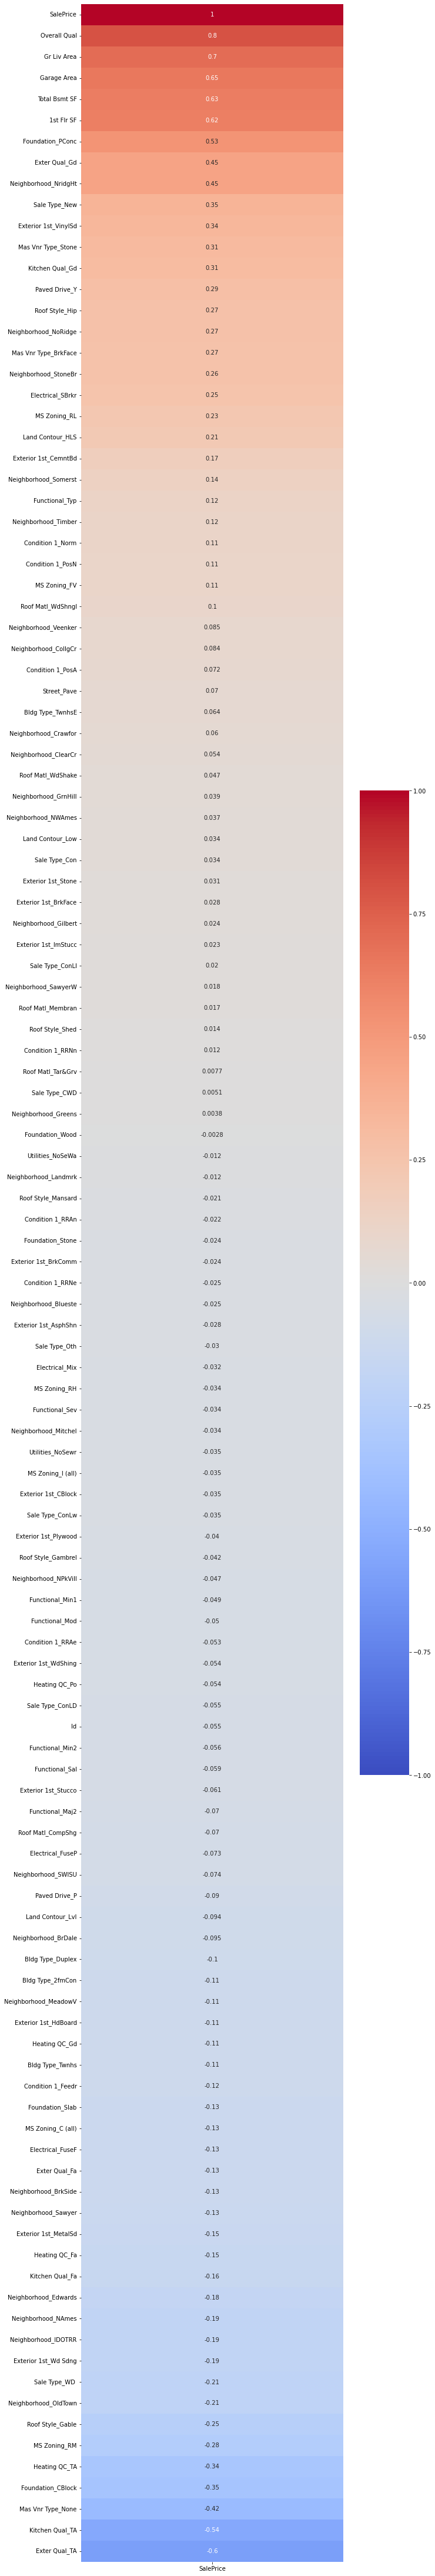

In [21]:
#look at the heat map again
plt.figure(figsize=(10,80))
sns.heatmap(home_train.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm');

Looking at this data we see that the Exterior Quality with a grade of TA is negatively correlated to the data at a rate of 0.6. We will at that to our model. But first let's look at more exploritory data. First, let us look at the best correlated factor, overall quality

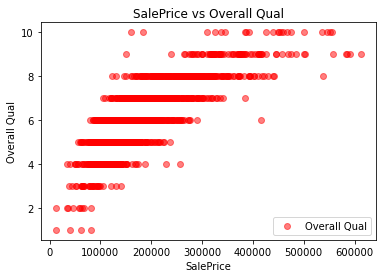

In [22]:
#Let's look at the graphs of some of these
#Let us start with the one with the most correlation. Overall Qual
plt.title('SalePrice vs Overall Qual')

plt.scatter(home_train['SalePrice'],
            home_train['Overall Qual'],
            color = 'r', alpha = 0.5, label = 'Overall Qual')
plt.xlabel('SalePrice')
plt.ylabel('Overall Qual')
plt.legend();

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

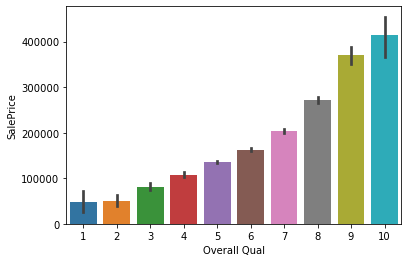

In [23]:
sns.barplot(y="SalePrice", x="Overall Qual", data=home_train)

We see a pretty linear correlation here. Now, how about the least correlated, Foundation_Wood?

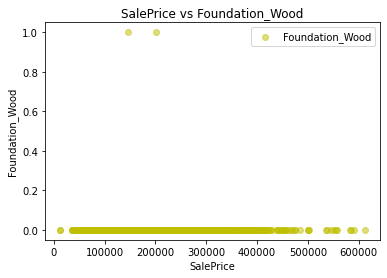

In [24]:

plt.title('SalePrice vs Foundation_Wood')

plt.scatter(home_train['SalePrice'],
            home_train['Foundation_Wood'],
            color = 'y', alpha = 0.5, label = 'Foundation_Wood')
plt.xlabel('SalePrice')
plt.ylabel('Foundation_Wood')
plt.legend();

<AxesSubplot:xlabel='Foundation_Wood', ylabel='SalePrice'>

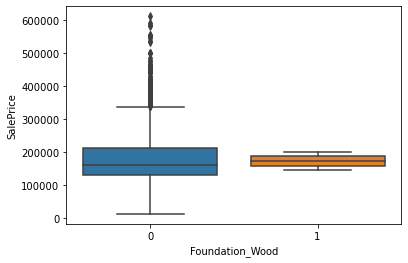

In [25]:
sns.boxplot(y="SalePrice", x="Foundation_Wood", data=home_train)

We see no real correlation between SalePrice and Foundation Wood. Now let's look at the most negatively correlated data, Extra Qual_TA

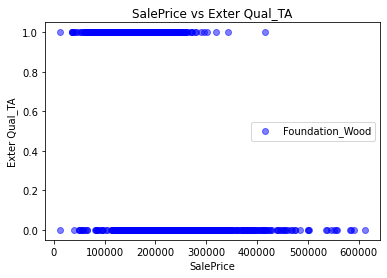

In [26]:
plt.title('SalePrice vs Exter Qual_TA')

plt.scatter(home_train['SalePrice'],
            home_train['Exter Qual_TA'],
            color = 'b', alpha = 0.5, label = 'Foundation_Wood')
plt.xlabel('SalePrice')
plt.ylabel('Exter Qual_TA')
plt.legend();

<AxesSubplot:xlabel='Exter Qual_TA', ylabel='SalePrice'>

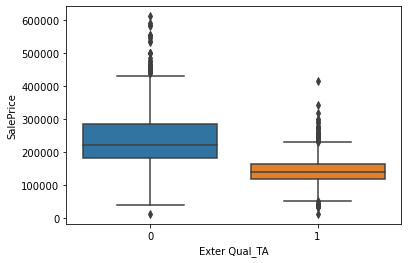

In [27]:
sns.boxplot(y="SalePrice", x="Exter Qual_TA", data=home_train)

We see that not having an External Quality of TA gives a higher chance at a higher sales price

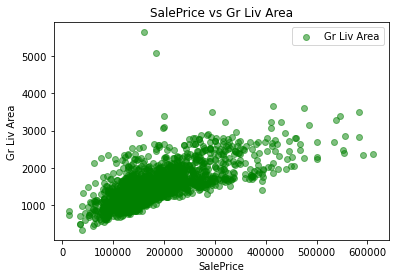

In [28]:
#Gr Liv Area is also higher correlated. Let's look
plt.title('SalePrice vs Gr Liv Area')

plt.scatter(home_train['SalePrice'],
            home_train['Gr Liv Area'],
            color = 'g', alpha = 0.5, label = 'Gr Liv Area')
plt.xlabel('SalePrice')
plt.ylabel('Gr Liv Area')
plt.legend();

We can see that an increase in Gr Liv Area gives and increase in SalePrice. Now we will make our X data with the columns that had a 0.6 or higher correlation, and our y data with the sales price

In [29]:
#The Only new column that absolute value of this that makes the 0.6 threshold is Exter Qual_TA
xvars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Exter Qual_TA']
X = home_train[xvars]
X.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Exter Qual_TA
0,6,1479,475.0,725.0,725,0
1,7,2122,559.0,913.0,913,0
2,5,1057,246.0,1057.0,1057,1
3,5,1444,400.0,384.0,744,1
4,6,1445,484.0,676.0,831,1


In [30]:
y = home_train['SalePrice']
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

We will make it a polynomial function, meaning that we make many new columns whose values are the columns we have times each other.

In [31]:
poly = PolynomialFeatures(include_bias = False, degree = 2)

In [32]:
X_poly = poly.fit_transform(X)

In [33]:
#pd.DataFrame(X, columns = poly.get_feature_names(xvars)).head()

In [34]:
poly = PolynomialFeatures(include_bias = False, degree=2)

We have to change the testing data to a polynomial fit in order for this to work

In [35]:
home_test_poly = poly.fit_transform(home_test[xvars])

Now it is time for our train test split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

We will first use a linear regression model and see how well it fits the data

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
prediction = lr.predict(home_test_poly)

In [40]:
home_test['SalePrice'] = prediction

Let us look at our R2 score

In [41]:
print(f'Training R2: {lr.score(X_train, y_train)}')
print(f'Testing R2: {lr.score(X_test, y_test)}')

Training R2: 0.8589933055335499
Testing R2: 0.879607496219049


The R^2 scores show that although it is slightly underfit, it is a good model overall

In [42]:
cross_val_score(lr, X_train, y_train, cv = 3).mean()

0.8219401785265875

This shows that the acceracy of the model accounts for 82.1% of the data. We will check the bias viance tradeoff now

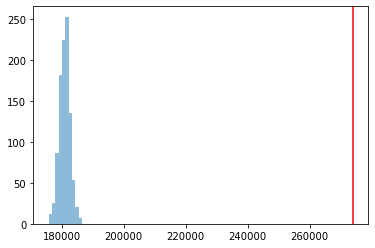

In [43]:
#Taken from lesson 3.03-bias-variance-tradeoff
from sklearn.dummy import DummyRegressor # high bias model
dummy_predictions = []

for i in range(1_000):
    # bootstrap x and y
    X_sample = X.sample(frac = 1.0, replace = True, random_state = i) # bootstrappin
    y_sample = y[X_sample.index]
    
    # create our model
    dummy = DummyRegressor()
    
    # fit the model
    dummy.fit(X_sample, y_sample)
    
    # add predictions on X_test to list
    dummy_prediction = dummy.predict(X_test)[0]
    dummy_predictions.append(dummy_prediction)
    
plt.axvline(y_test.values[0], color = 'r')
plt.hist(dummy_predictions, alpha = .5);

The model seems to be high bias

In [44]:
lr_submission = home_test[['Id', 'SalePrice']]

In [45]:
lr_submission.head()

,Id,SalePrice
0,2658,196809.987067
1,2718,155217.865393
2,2414,164018.329643
3,1989,120833.763933
4,625,181679.021178


In [46]:
#lr_submission.to_csv('kaggle/6_14_submission_try1.csv')

Let's try to improve with OSL. We first need a standard scaler we will call Z

In [47]:
#took from lesson 4.03
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [48]:
ols = LinearRegression()
ols.fit(Z_train, y_train)

LinearRegression()

In [49]:
print(f'Training Score: {ols.score(Z_train, y_train)}')
print(f'Testing Score: {ols.score(Z_test, y_test)}')

Training Score: 0.8589933055335499
Testing Score: 0.8796074962187521


We see that just standardizing the data doesn't have a huge impact on the R2 score. But we can use this to test our rigde model

In [50]:
#took from lesson 4.03
#seems like there is no change. But that's why we need the ridge
from sklearn.linear_model import Ridge
# Instantiate.
ridge = Ridge()
# Fit.
ridge.fit(Z_train, y_train)
# Evaluate model using R2.
print(f'Training score: {ridge.score(Z_train, y_train)}')
print(f'Test score: {ridge.score(Z_test, y_test)}')

Training score: 0.8581281624074523
Test score: 0.8814058035012804


The ridge model model by default (alpha = 1) is a bit underfit and slightly worse than our linear regression model. Let's check for alpha = 100, 10, and 0.1.

In [51]:
#took from lesson 4.03
#We see some potential improvement. But let us increase the alpha on the ridge
# Instantiate.
ridge = Ridge(alpha=100)
# Fit.
ridge.fit(Z_train, y_train)
# Evaluate model using R2.
print(f'Training score: {ridge.score(Z_train, y_train)}')
print(f'Test score: {ridge.score(Z_test, y_test)}')

Training score: 0.8369045234885745
Test score: 0.8682739861573182


In [52]:
#took from lesson 4.03
#We see some potential improvement. But let us increase the alpha on the ridge
# Instantiate.
ridge = Ridge(alpha=10)
# Fit.
ridge.fit(Z_train, y_train)
# Evaluate model using R2.
print(f'Training score: {ridge.score(Z_train, y_train)}')
print(f'Test score: {ridge.score(Z_test, y_test)}')

Training score: 0.8540571715954446
Test score: 0.881223773807563


In [53]:
#took from lesson 4.03
#We see some potential improvement. But let us increase the alpha on the ridge
# Instantiate.
ridge = Ridge(alpha=0.1)
# Fit.
ridge.fit(Z_train, y_train)
# Evaluate model using R2.
print(f'Training score: {ridge.score(Z_train, y_train)}')
print(f'Test score: {ridge.score(Z_test, y_test)}')

Training score: 0.8589676076757262
Test score: 0.8800022050891458


Out of all these, the alpha = 100 is the worst and the others are roughly the same. Regardless they are all worse than the linear regression model.

In [54]:
prediction = ridge.predict(home_test_poly)

In [55]:
home_test['SalePrice'] = prediction

In [56]:
lr_submission = home_test[['Id', 'SalePrice']]

In [57]:
#lr_submission.to_csv('kaggle/6_16_submission_try1.csv')

Now that we tried ridge lets try lasso. We will check all the alpha whole numbers between -100 and 100 to try to find the best one

In [58]:
#this did not improve our score. But what about lasso?
from sklearn.linear_model import Lasso, LassoCV

In [59]:
#took from lesson 4.03
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-100, 100, 200)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas)
# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train)

C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69506210870.8208, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437564355904.9374, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496298350385.09973, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

LassoCV(alphas=array([1.00000000e-100, 1.01163798e-099, 1.02341140e-098, 1.03532184e-097,
       1.04737090e-096, 1.05956018e-095, 1.07189132e-094, 1.08436597e-093,
       1.09698580e-092, 1.10975250e-091, 1.12266777e-090, 1.13573336e-089,
       1.14895100e-088, 1.16232247e-087, 1.17584955e-086, 1.18953407e-085,
       1.20337784e-084, 1.21738273e-083, 1.23155060e-082, 1.24588336e-081,
       1.260382...
       7.66341087e+076, 7.75259749e+077, 7.84282206e+078, 7.93409667e+079,
       8.02643352e+080, 8.11984499e+081, 8.21434358e+082, 8.30994195e+083,
       8.40665289e+084, 8.50448934e+085, 8.60346442e+086, 8.70359136e+087,
       8.80488358e+088, 8.90735464e+089, 9.01101825e+090, 9.11588830e+091,
       9.22197882e+092, 9.32930403e+093, 9.43787828e+094, 9.54771611e+095,
       9.65883224e+096, 9.77124154e+097, 9.88495905e+098, 1.00000000e+100]))

In [60]:
# Here is the optimal value of alpha
lasso_cv.alpha_

32.17641750250643

In [61]:
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.85805538816112
0.881205994779678


We can see that the lasso value is as good as the ridge values. But what if we introduce polynomials?

In [62]:
poly

PolynomialFeatures(include_bias=False)

In [63]:
#took from lesson 4.03
lasso_coefs = pd.Series(lasso_cv.coef_, poly.get_feature_names(X.columns))

In [64]:
#took from lesson 4.03
lasso_coefs[lasso_coefs != 0].sort_values(ascending = False)

Overall Qual Total Bsmt SF     78829.869285
Overall Qual Gr Liv Area       57722.420917
1st Flr SF^2                   30185.348797
Overall Qual Garage Area       28277.164718
Exter Qual_TA^2                19636.827611
Gr Liv Area                    16540.521122
1st Flr SF                     16277.036619
Overall Qual 1st Flr SF        14093.525773
Gr Liv Area Garage Area        12607.117256
Gr Liv Area Total Bsmt SF       3184.304949
Garage Area Exter Qual_TA       2429.363353
Exter Qual_TA                   2128.355467
Garage Area Total Bsmt SF       -615.524715
1st Flr SF Exter Qual_TA       -1538.284156
Total Bsmt SF Exter Qual_TA    -1573.052285
Garage Area 1st Flr SF         -5502.409478
Total Bsmt SF                  -6492.395276
Garage Area^2                  -7291.263551
Garage Area                    -8996.591807
Gr Liv Area Exter Qual_TA     -10544.722363
Overall Qual Exter Qual_TA    -13500.381522
Total Bsmt SF^2               -26822.854426
Total Bsmt SF 1st Flr SF      -2

In [65]:
prediction = lasso_cv.predict(home_test_poly)

In [66]:
home_test['SalePrice'] = prediction

In [67]:
lr_submission = home_test[['Id', 'SalePrice']]

In [68]:
lr_submission.head()

,Id,SalePrice
0,2658,-1.367067e+11
1,2718,-3.497654e+11
2,2414,-7.022018e+10
3,1989,-8.413682e+10
4,625,-1.748668e+11


Clearly these values are way too high. Not a good model to use

In [69]:
#lr_submission.to_csv('kaggle/6_16_submission_try2.csv')

Finally, let's introduce elastic net model. We will see of this is better than linear regression or not

In [70]:
from sklearn.linear_model import ElasticNetCV

We will try this for alphas from -100 and 100 again as well as enet ratio of 0.1, 0.3, 0.5, 0.7 and 0.9 to find the best one

In [71]:
#took from lesson 4.03
# Set up a list of alphas to check.
enet_alphas = np.linspace(-100, 100, 200)

# Set up our l1 ratio.
enet_ratio = 0.1

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_test)
enet_model_preds_train = enet_model.predict(X_train)

# Evaluate model.
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 565041520296.0386, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 563188921278.279, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 563089117407.535, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conv

0.8566604033351621
0.8771916988880103


C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not conver

In [72]:
# Here is the optimal value of alpha.
enet_model.alpha_

0.5025125628140614

In [73]:
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

0.8566604033351621
0.8771916988880103


In [74]:
prediction = enet_model.predict(home_test_poly)
home_test['SalePrice'] = prediction
lr_submission = home_test[['Id', 'SalePrice']]
lr_submission.head()

,Id,SalePrice
0,2658,195239.227962
1,2718,153399.349118
2,2414,165294.509835
3,1989,129609.028226
4,625,184323.602327


In [75]:
#took from lesson 4.03
# Set up a list of alphas to check.
enet_alphas = np.linspace(-100, 100, 200)

# Set up our l1 ratio.
enet_ratio = 0.3

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_test)
enet_model_preds_train = enet_model.predict(X_train)

# Evaluate model.
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564482444826.2412, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562612755136.159, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562503845254.165, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conv

0.8566951214942687
0.877157272542599


C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not conver

In [76]:
enet_model.alpha_

0.5025125628140614

In [77]:
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

0.8566951214942687
0.877157272542599


In [78]:
prediction = enet_model.predict(home_test_poly)
home_test['SalePrice'] = prediction
lr_submission = home_test[['Id', 'SalePrice']]
lr_submission.head()

,Id,SalePrice
0,2658,195357.724959
1,2718,153150.685479
2,2414,165169.559164
3,1989,129620.215842
4,625,184340.154211


In [79]:
#took from lesson 4.03
# Set up a list of alphas to check.
enet_alphas = np.linspace(-100, 100, 200)

# Set up our l1 ratio.
enet_ratio = 0.5

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_test)
enet_model_preds_train = enet_model.predict(X_train)

# Evaluate model.
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 563607747818.6293, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 561710462828.0491, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 561589981169.441, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

0.8567435387661516
0.8771281184276134


C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not conver

In [80]:
enet_model.alpha_

0.5025125628140614

In [81]:
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

0.8567435387661516
0.8771281184276134


In [82]:
prediction = enet_model.predict(home_test_poly)
home_test['SalePrice'] = prediction
lr_submission = home_test[['Id', 'SalePrice']]
lr_submission.head()

,Id,SalePrice
0,2658,195479.482107
1,2718,152927.216882
2,2414,165048.562546
3,1989,129592.544658
4,625,184346.031730


In [83]:
#took from lesson 4.03
# Set up a list of alphas to check.
enet_alphas = np.linspace(-100, 100, 200)

# Set up our l1 ratio.
enet_ratio = 0.7

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_test)
enet_model_preds_train = enet_model.predict(X_train)

# Evaluate model.
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 561901288663.1925, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559948052950.2715, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559810288338.4688, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

0.8568371560699457
0.8771340364830428


C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not conver

In [84]:
enet_model.alpha_

0.5025125628140614

In [85]:
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

0.8568371560699457
0.8771340364830428


In [86]:
prediction = enet_model.predict(home_test_poly)
home_test['SalePrice'] = prediction
lr_submission = home_test[['Id', 'SalePrice']]
lr_submission.head()

,Id,SalePrice
0,2658,195598.974189
1,2718,152776.218617
2,2414,164929.031397
3,1989,129449.345779
4,625,184319.621415


In [87]:
#took from lesson 4.03
# Set up a list of alphas to check.
enet_alphas = np.linspace(-100, 100, 200)

# Set up our l1 ratio.
enet_ratio = 0.9

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_test)
enet_model_preds_train = enet_model.predict(X_train)

# Evaluate model.
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 556305858741.2664, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 554152923144.0769, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553983330937.2305, tolerance: 708342286.5863948
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

0.8572049110802673
0.877419684319424


C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 764817502.7048419
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not conver

In [88]:
enet_model.alpha_

0.5025125628140614

In [89]:
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

0.8572049110802673
0.877419684319424


In [90]:
prediction = enet_model.predict(home_test_poly)
home_test['SalePrice'] = prediction
lr_submission = home_test[['Id', 'SalePrice']]
lr_submission.head()

,Id,SalePrice
0,2658,195649.426740
1,2718,153013.680724
2,2414,164761.550573
3,1989,128610.196917
4,625,184094.653282


First off, we see that the enet_ratio didn't change anything. Also, we can see that R2 score is similar to the linear regression model. However, the sales prices in the head data seem to high.

In [91]:
#lr_submission.to_csv('kaggle/6_16_submission_try2.csv')

## Conclusion

We see that the best model to use for the data is a linear regression model. It accounts for around 82.1% of the data.